In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
df_aapl = pd.read_csv('datasets/AAPL.csv')
df_aapl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [15]:
df_aapl['Date'] = pd.to_datetime(df_aapl['Date'])
df_aapl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1259 non-null   datetime64[ns]
 1   Open       1259 non-null   float64       
 2   High       1259 non-null   float64       
 3   Low        1259 non-null   float64       
 4   Close      1259 non-null   float64       
 5   Adj Close  1259 non-null   float64       
 6   Volume     1259 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 69.0 KB


In [16]:
print(f'Dataframe contains stock prices between {df_aapl.Date.min()} {df_aapl.Date.max()}')
print(f'Total days = {(df_aapl.Date.max() - df_aapl.Date.min()).days} days')

Dataframe contains stock prices between 2019-07-29 00:00:00 2024-07-29 00:00:00
Total days = 1827 days


In [17]:
df_aapl.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,1259,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,2022-01-25 01:54:22.589356544,139.267563,140.829911,137.809716,139.385717,137.781834,9.586690e+07
min,2019-07-29 00:00:00,48.852501,49.517502,48.145000,48.334999,46.647972,2.404830e+07
25%,2020-10-24 12:00:00,118.470001,119.649998,116.330002,118.152501,115.697185,6.114580e+07
50%,2022-01-25 00:00:00,146.440002,148.100006,145.250000,146.710007,144.712784,8.222550e+07
75%,2023-04-26 12:00:00,171.739998,173.504997,170.379997,172.110001,170.596382,1.125240e+08
max,2024-07-29 00:00:00,236.479996,237.229996,233.089996,234.820007,234.820007,4.265100e+08
std,NaN,42.141171,42.432772,41.838079,42.134132,42.551744,5.241893e+07


<Axes: >

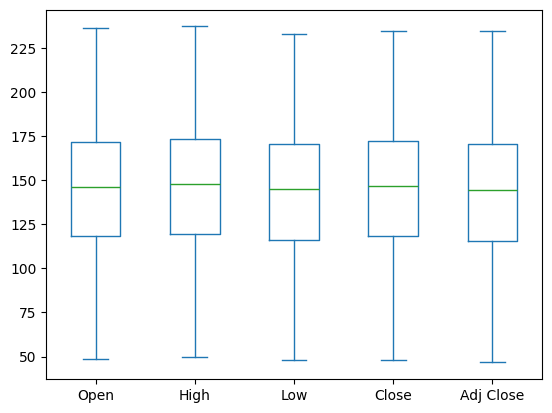

In [18]:
df_aapl[['Open', 'High', 'Low', 'Close', 'Adj Close']].plot(kind='box')

In [19]:
# Setting the layout for our plot
import plotly.graph_objs as go
layout = go.Layout(
    title='Stock Prices of Apple',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color = '#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color = '#7f7f7f'
        )
    )
)

df_aapl_data = [go.Scatter(x=df_aapl['Date'], y=df_aapl['Close'], mode='lines', name='Apple')]
plot = go.Figure(data = df_aapl_data, layout = layout)

In [20]:
plot.show(renderer = "browser")

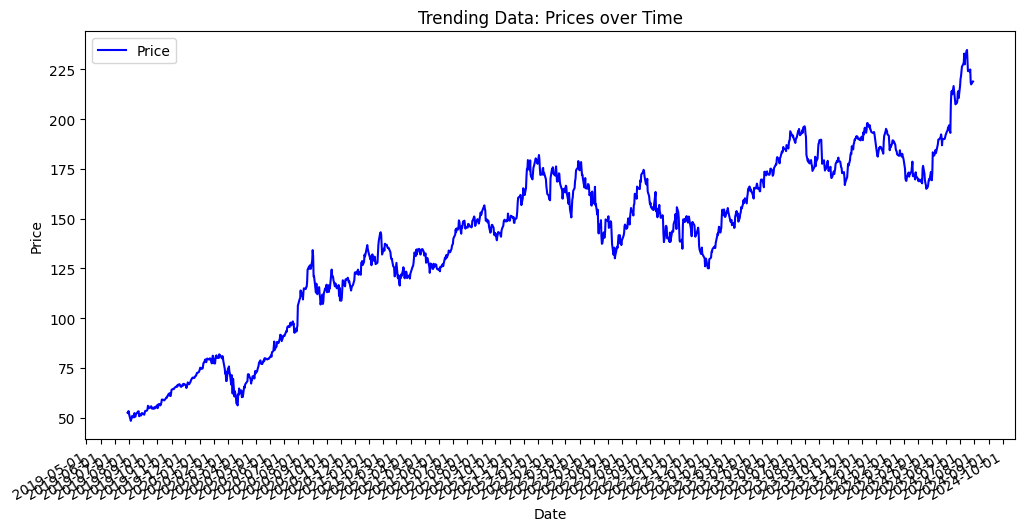

In [22]:
import matplotlib.dates as mdates

# Plotting with Matplotlib
plt.figure(figsize=(12, 6))

# Plot the data
plt.plot(df_aapl['Date'], df_aapl['Close'], color='b', label='Price')

# Format the plot
plt.title('Trending Data: Prices over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Format x-axis to show dates properly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()  # Rotate date labels

# Show plot
plt.show()


In [ ]:
# Buliding the regression model


# Preprocessing


# Model Evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [34]:
x = df_aapl.iloc[ : , 0].values
x = x.astype(np.int64) // 10**9 # Convert to seconds since epoch
x = x.reshape(-1,1)
print(x)

[[1564358400]
 [1564444800]
 [1564531200]
 ...
 [1721865600]
 [1721952000]
 [1722211200]]


In [35]:
y = df_aapl.iloc[ : , 4].values
print(y)

[ 52.419998  52.195     53.259998 ... 217.490005 217.960007 218.970505]


In [36]:
# Split the data into training ans test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 48)

In [37]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

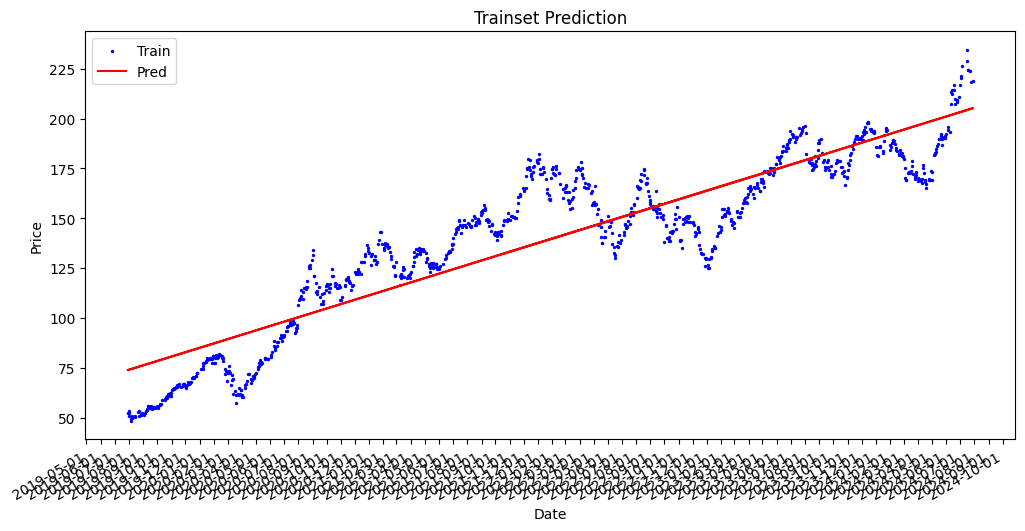

In [60]:
plt.figure(figsize=(12, 6))

plt.scatter(pd.to_datetime(x_train, unit='s'), y_train, color='blue', label = 'Train', s=2)
plt.plot(pd.to_datetime(x_train, unit='s'), lm.predict(x_train), color = 'red', label = 'Pred')

plt.title('Trainset Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Format x-axis to show dates properly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()  # Rotate date labels

# Show plot
plt.show()

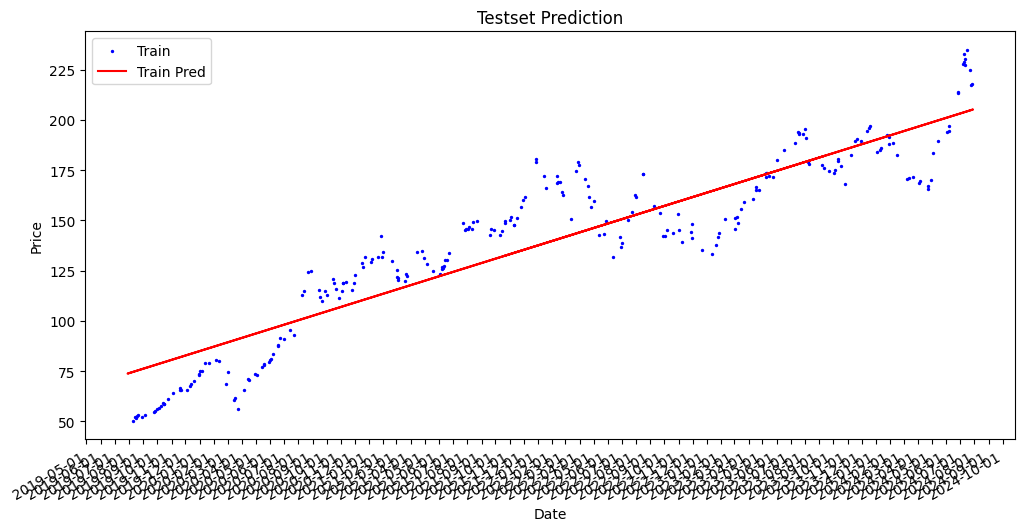

In [59]:
plt.figure(figsize=(12, 6))

plt.scatter(pd.to_datetime(x_test, unit='s'), y_test, color='blue', label = 'Test', s=2)
plt.plot(pd.to_datetime(x_train, unit='s'), lm.predict(x_train), color = 'red', label = 'Pred')

plt.title('Testset Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Format x-axis to show dates properly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()  # Rotate date labels

# Show plot
plt.show()

In [62]:
# Calculate score from model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(y_train, lm.predict(x_train))}\t{r2_score(y_test, lm.predict(x_test))}
{'MSE'.ljust(10)}{mse(y_train, lm.predict(x_train))}\t{mse(y_test, lm.predict(x_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.8256086494638603	0.8531771910813748
MSE       299.3433566096386	293.9489778285974

